In [ ]:
!pip install automata-lib
!pip install colormath
!pip install visual-automata
!pip install coloraide
!apt install libgraphviz-dev
!pip install pygraphviz

  Using cached coloraide-3.1.1-py3-none-any.whl (249 kB)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgraphviz-dev is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.9/104.9 kB 2.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pygraphviz: filename=pygraphviz-1.12-cp310-cp310-linux_x86_64.whl size=168135 sha256=30d4d51fc6f611a61e0580f0bd8605ddb99ee72df4f46f5a86b6fbd0720a6620
  Stored in directory: /root/.cache/pip/wheels/1d/ee/b5/a2f54f9e9b3951599c05dcce270ca85e472f8e6cec470e397a
Successfully built pygraphviz


https://github.com/caleb531/automata  
https://github.com/lewiuberg/visual-automata  
https://github.com/caleb531/automata/blob/main/automata/fa/nfa.py  
https://github.com/caleb531/automata/blob/main/automata/fa/dfa.py  
https://github.com/caleb531/automata/blob/main/automata/regex/regex.py  
https://stackoverflow.com/questions/58535604/installing-pygrahviz-in-google-colab  

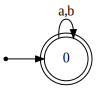

In [ ]:
from automata.fa.dfa import DFA
from automata.fa.nfa import NFA
from typing import FrozenSet

# TBD: find a way to remove the numbers inside the states (circles)
# test run
regex = "(a|b)*"
nfa = NFA.from_regex(regex, input_symbols=frozenset(["a", "b"]))
dfa = DFA.from_nfa(nfa)
dfa.show_diagram()

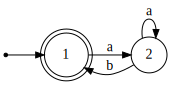

In [ ]:
# "+" means different here
regex = "(a+b)*"
nfa = NFA.from_regex(regex, input_symbols=frozenset(["a", "b"]))
dfa = DFA.from_nfa(nfa)
dfa.show_diagram()

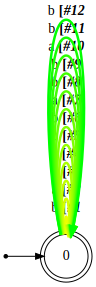

In [ ]:
# see if some dfa accepts some strings
regex = "(a|b)*"
nfa = NFA.from_regex(regex, input_symbols=frozenset(["a", "b"]))
dfa = DFA.from_nfa(nfa)
dfa.show_diagram("bababbabbabb")

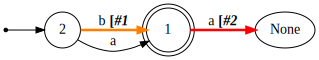

In [ ]:
# trap state (?)
regex = "(a|b)"
nfa = NFA.from_regex(regex, input_symbols=frozenset(["a", "b"]))
dfa = DFA.from_nfa(nfa)
dfa.show_diagram("ba")

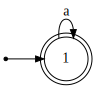

In [ ]:
# empty string
# no colored arrows because there is nothing to keep track of
regex = "(a)*"
# regex = "()" # empty string regex
nfa = NFA.from_regex(regex, input_symbols=frozenset(["a", "b"]))
dfa = DFA.from_nfa(nfa)
dfa.show_diagram("")

In [ ]:
def regex2dfa(regex: str, alphabet: list):
    nfa = NFA.from_regex(regex, input_symbols=frozenset(alphabet))
    dfa = DFA.from_nfa(nfa)
    return dfa
    # return DFA.from_nfa(NFA.from_regex(regex, input_symbols=frozenset(alphabet)))

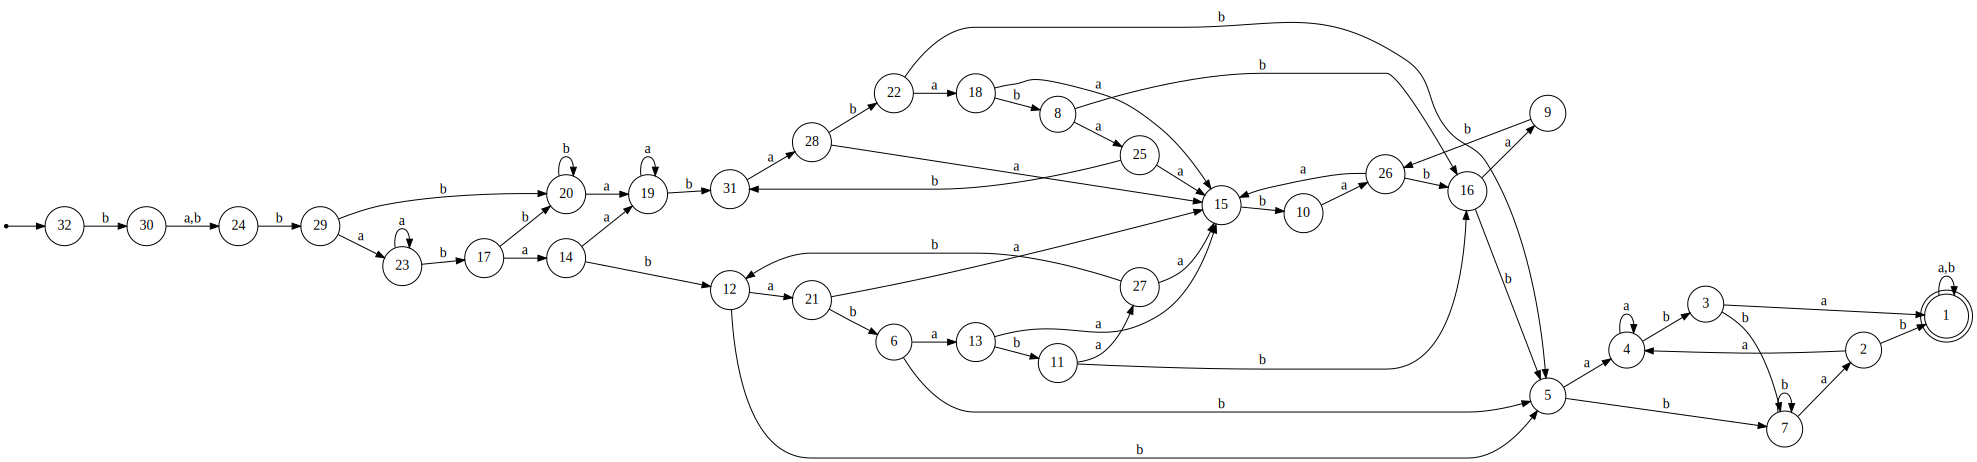

In [ ]:
# examples given use "+" for OR
# library uses "|" (vertical bar) for OR

# 1. (bab+bbb)a*b*(a*+b*)(ba)*(aba)(bab+aba)*bb(a+b)*(bab+aba)(a+b)*
dfa1 = regex2dfa("(bab|bbb)a*b*(a*|b*)(ba)*(aba)(bab|aba)*bb(a|b)*(bab|aba)(a|b)*", ["a", "b"])
dfa1.show_diagram()

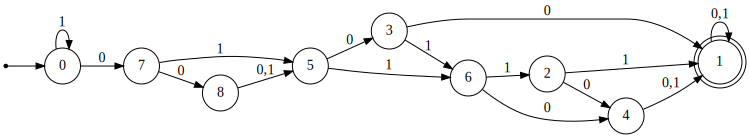

In [ ]:
# 2. (1+0)*1*0*(101+01+000)(1+0)*(101+00)*(111+00+101)(1+0)*
dfa2 = regex2dfa("(1|0)*1*0*(101|01|000)(1|0)*(101|00)*(111|00|101)(1|0)*", ["0", "1"])
dfa2.show_diagram()

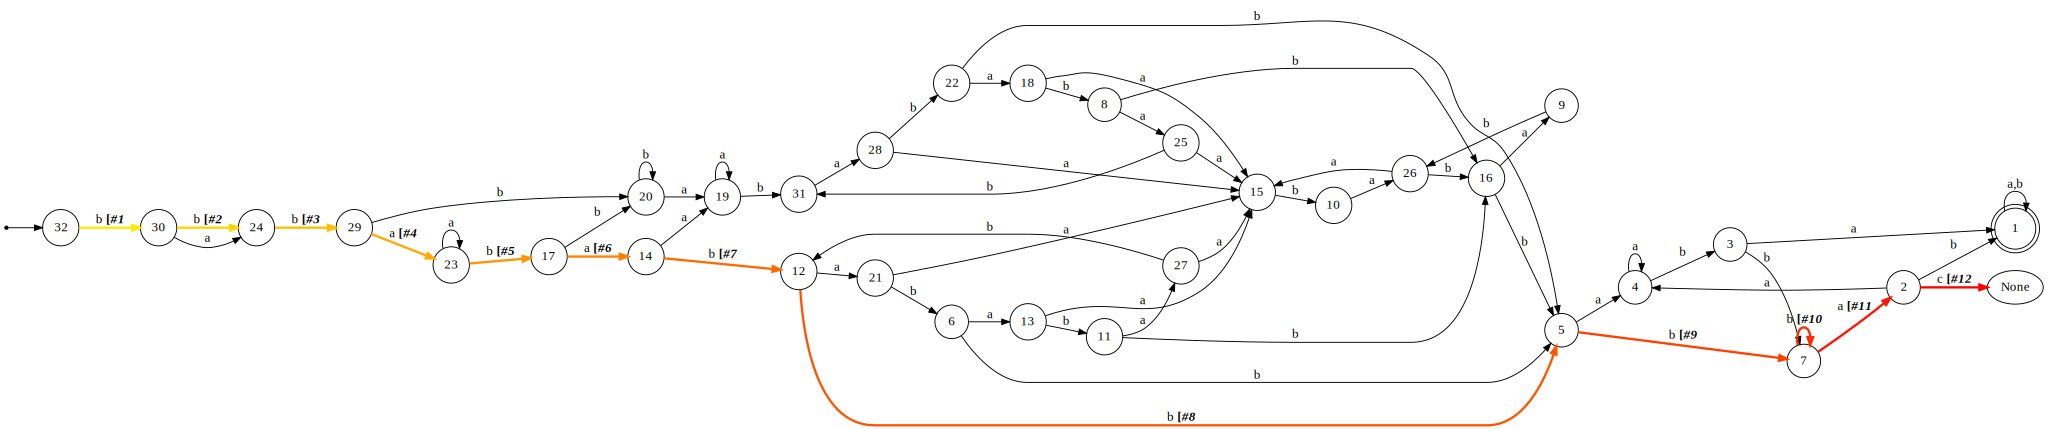

In [ ]:
# see if dfa1 accepts some random string
# should not go to final state
dfa1.show_diagram("bbbababbbbac")

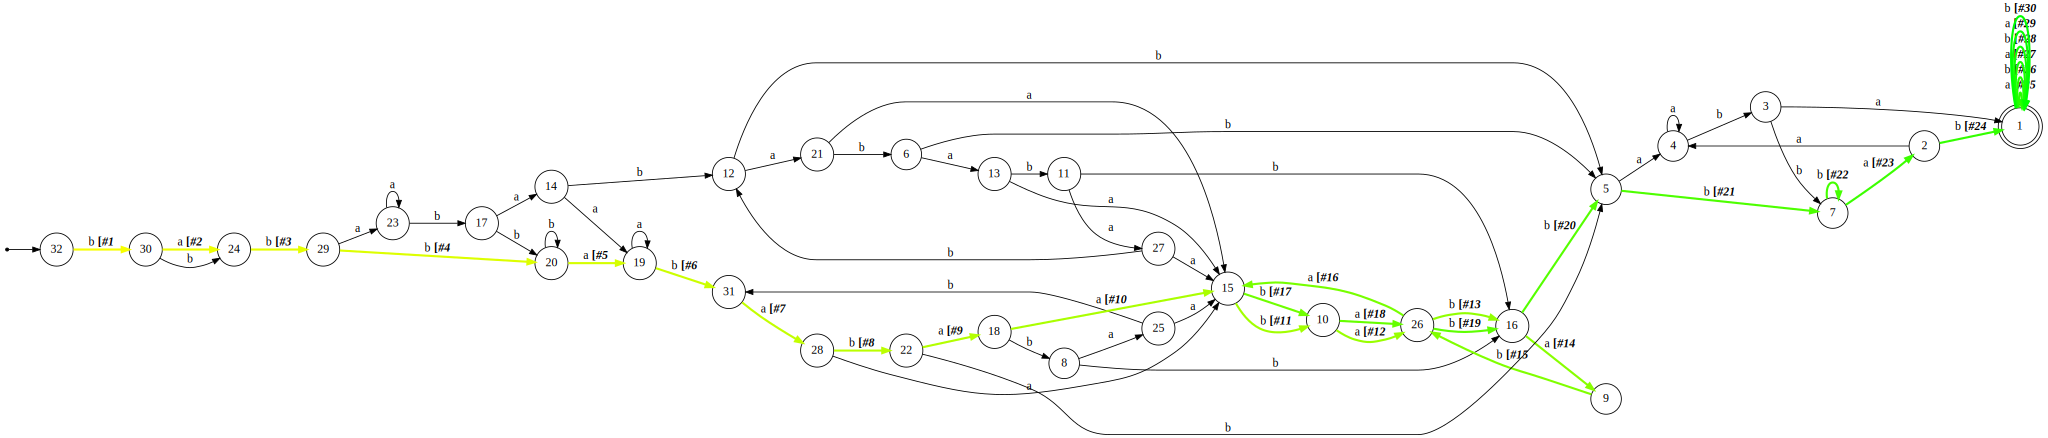

In [ ]:
# dfa1 valid string test
# bab baba ba aba bababa bb b bab ababab
dfa1.show_diagram("babbababaabababababbbbabababab")

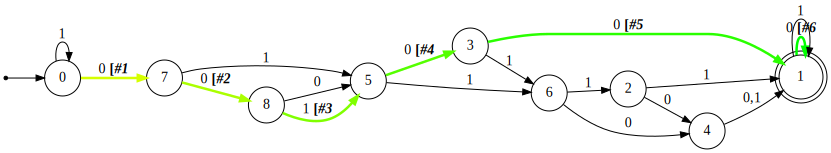

In [ ]:
dfa2.show_diagram("001000")

In [ ]:
# https://github.com/caleb531/automata/tree/main/automata/fa
# especially:
# https://github.com/caleb531/automata/blob/main/automata/fa/nfa.py, from_regex()
# https://github.com/caleb531/automata/blob/main/automata/fa/dfa.py, from_nfa()

# garbage
# visual_dfa = VisualDFA.minify(VisualDFA(dfa))
# , input_symbols=frozenset(["a", "b", "c"])
# visual_dfa.show_diagram()

''' dfa = VisualDFA(
    states={"q0", "q1", "q2", "q3", "q4"},
    input_symbols={"0", "1"},
    transitions={
        "q0": {"0": "q3", "1": "q1"},
        "q1": {"0": "q3", "1": "q2"},
        "q2": {"0": "q3", "1": "q2"},
        "q3": {"0": "q4", "1": "q1"},
        "q4": {"0": "q4", "1": "q1"},
    },
    initial_state="q0",
    final_states={"q2", "q4"},
) '''

''' dfa = VisualDFA(
    states={"1", "2", "3", "4", "5", "6", "7", "-1"},
    input_symbols={"a", "b"},
    transitions={"1": {'a': "-1", 'b': "1"}, "2": {'a': "-1", 'b': "1"}, "3": {'a': "-1", 'b': "2"}, "4": {'a': "-1", 'b': "3"}, "5": {'a': "-1", 'b': "4"}, "6": {'a': "5", 'b': "-1"}, "7": {'a': "-1", 'b': "6"}, "-1": {'a': "-1", 'b': "-1"}},
    initial_state="7",
    final_states={"1"}
) '''

# dfa.show_diagram()
# DFA(states={1, 2, 3, 4, 5, 6, 7}, input_symbols={'a', 'b'}, transitions={1: {'b': 1}, 2: {'b': 1}, 3: {'b': 2}, 4: {'b': 3}, 5: {'b': 4}, 6: {'a': 5}, 7: {'b': 6}}, initial_state=7, final_states={1}, allow_partial=True)
# DFA(states={1, 2, 3, 4, 5, 6, 7, -1}, input_symbols={'a', 'b'}, transitions={1: {'a': -1, 'b': 1}, 2: {'a': -1, 'b': 1}, 3: {'a': -1, 'b': 2}, 4: {'a': -1, 'b': 3}, 5: {'a': -1, 'b': 4}, 6: {'a': 5, 'b': -1}, 7: {'a': -1, 'b': 6}, -1: {'a': -1, 'b': -1}}, initial_state=7, final_states={1}, allow_partial=False)
# dfa.show_diagram()

# hot garbage
# DFA(states={1, 2, 3}, input_symbols={'a', 'b'}, transitions={1: {}, 2: {'a': 2, 'b': 1}, 3: {'a': 2}}, initial_state=3, final_states={1}, allow_partial=True)
# DFA(states={1, 2}, input_symbols={'a', 'b'}, transitions={1: {}, 2: {'a': 1, 'b': 1}}, initial_state=2, final_states={1}, allow_partial=True)

' dfa = VisualDFA(\n    states={"1", "2", "3", "4", "5", "6", "7", "-1"},\n    input_symbols={"a", "b"},\n    transitions={"1": {\'a\': "-1", \'b\': "1"}, "2": {\'a\': "-1", \'b\': "1"}, "3": {\'a\': "-1", \'b\': "2"}, "4": {\'a\': "-1", \'b\': "3"}, "5": {\'a\': "-1", \'b\': "4"}, "6": {\'a\': "5", \'b\': "-1"}, "7": {\'a\': "-1", \'b\': "6"}, "-1": {\'a\': "-1", \'b\': "-1"}},\n    initial_state="7",\n    final_states={"1"}\n) '